In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
import random
%matplotlib inline

In [2]:
!wget -O female.csv https://api.dane.gov.pl/resources/54110,lista-imion-zenskich-w-rejestrze-pesel-stan-na-19012024-imie-pierwsze/csv
!wget -O male.csv https://api.dane.gov.pl/resources/54109,lista-imion-meskich-w-rejestrze-pesel-stan-na-19012023-imie-pierwsze/csv


/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-04-24 13:25:46--  https://api.dane.gov.pl/resources/54110,lista-imion-zenskich-w-rejestrze-pesel-stan-na-19012024-imie-pierwsze/csv
Resolving api.dane.gov.pl (api.dane.gov.pl)... 185.41.93.178
Connecting to api.dane.gov.pl (api.dane.gov.pl)|185.41.93.178|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://api.dane.gov.pl/media/resources/20240126/8_-_Wykaz_imion_%C5%BCe%C5%84skich_os%C3%B3b_%C5%BCyj%C4%85cych_wg_pola_imi%C4%99_pierwsze_wyst%C4%99puj%C4%85cych_w_rejestrze_PESEL_bez_zgon%C3%B3w.csv [following]
Incomplete or invalid multibyte sequence encountered
--2024-04-24 13:25:46--  https://api.dane.gov.pl/media/resources/20240126/8_-_Wykaz_imion_%C5%BCe%C5%84skich_os%C3%B3b_%C5%BCyj%C4%85cych_wg_pola_imi%C4%99_pierwsze_wyst%C4%99puj%C4%85cych_w_rejestrze_PESEL_bez_zgon%C3%B3w.csv
Reusing existing connection to api.dane.gov.pl:443.
HTTP request sent, awaiting response...

In [3]:
def filter_names_by_threshold(filename, threshold):
    names = []
    with open(filename, 'r', encoding='utf8') as file:
        lines = file.read().splitlines()
        for line in lines[1:]:
            entry = line.split(",")
            if int(entry[2]) > threshold:
                names.append(entry[0])
    return names



femaleNames = filter_names_by_threshold('female.csv', 20)
print("Female names number with a number greater than threshold: " + str(len(femaleNames)))
print(femaleNames[:8])

maleNames = filter_names_by_threshold('male.csv', 20)
print("Male names number with a number greater than threshold: " + str(len(maleNames)))
print(maleNames[:8])

Female names number with a number greater than 100: 3708
['ANNA', 'KATARZYNA', 'MARIA', 'MAŁGORZATA', 'AGNIESZKA', 'BARBARA', 'EWA', 'MAGDALENA']
Male names number with a number greater than 100: 5269
['PIOTR', 'KRZYSZTOF', 'TOMASZ', 'ANDRZEJ', 'PAWEŁ', 'MICHAŁ', 'JAN', 'MARCIN']


In [4]:
file2 = open('male.csv', 'r',encoding='utf8').read().splitlines()
maleNames=file2[1:]
maleNames=[entry.split(",")[0] for entry in maleNames]
print("Male names number: "+str(len(maleNames)))
maleNames[:8]

Male names number: 37053


['PIOTR', 'KRZYSZTOF', 'TOMASZ', 'ANDRZEJ', 'PAWEŁ', 'MICHAŁ', 'JAN', 'MARCIN']

In [5]:
def has_polish_or_english_chars(name):
    polish_chars = 'ĄĆĘŁŃÓŚŹŻABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return all(char in polish_chars for char in name)

#source=femaleNames+maleNames
source=femaleNames
print("Combined names number: "+str(len(source)))
#Lets filter out names with spaces because those can be aproximated as 2 names

words= list(filter(lambda x: ' ' not in x, source))
print("Filtered names number: "+str(len(words)))
words= list(filter(lambda x: has_polish_or_english_chars(x), words))
print("Filtered names number: "+str(len(words)))
random.shuffle(words)

words[:10]
#wierdNames=list(filter(lambda x: ' ' in x, source))
#wierdNames[:8]

Combined names number: 3708
Filtered names number: 3646
Filtered names number: 3517


['IAMZE',
 'MARIONILA',
 'PATIENCE',
 'KIARA',
 'PELAGIA',
 'NAILIA',
 'MIRKA',
 'IGNACJA',
 'YEMILIIA',
 'ALEXANDRIA']

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print("itos: ",itos)
print("stoi: ",stoi)
VOCAB_SIZE=len(chars)+1
print("VOCAB_SIZE: ",VOCAB_SIZE)

itos:  {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'Ó', 28: 'Ą', 29: 'Ę', 30: 'Ł', 31: 'Ń', 32: 'Ś', 33: 'Ż', 0: '.'}
stoi:  {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'Ó': 27, 'Ą': 28, 'Ę': 29, 'Ł': 30, 'Ń': 31, 'Ś': 32, 'Ż': 33, '.': 0}
VOCAB_SIZE:  34


In [7]:
# hyperparameters
BLOCK_SIZE = 3
BATCH_SIZE = 32
EMBEDING_DIMENSION=10
HIDDEN_LAYER_SIZE=200

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * BLOCK_SIZE
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([20317, 3]) torch.Size([20317])
torch.Size([2585, 3]) torch.Size([2585])
torch.Size([2561, 3]) torch.Size([2561])


In [8]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((VOCAB_SIZE, EMBEDING_DIMENSION), generator=g)
W1 = torch.randn((EMBEDING_DIMENSION*BLOCK_SIZE, HIDDEN_LAYER_SIZE), generator=g)
b1 = torch.randn(HIDDEN_LAYER_SIZE, generator=g)
W2 = torch.randn((HIDDEN_LAYER_SIZE, VOCAB_SIZE), generator=g)
b2 = torch.randn(VOCAB_SIZE, generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
sum(p.nelement() for p in parameters) # number of parameters in total

13374

In [10]:
for p in parameters:
  p.requires_grad = True

In [11]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [12]:
lri = []
lossi = []
stepi = []

In [13]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (BATCH_SIZE,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, EMBEDING_DIMENSION*BLOCK_SIZE) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 34)

  # ugly cross entropy
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()

  loss = F.cross_entropy(logits, Ytr[ix])



  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

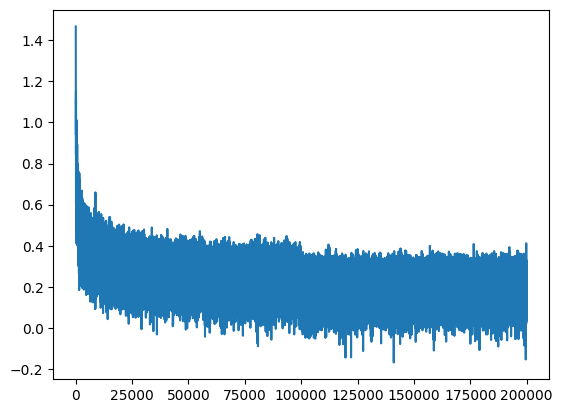

In [14]:
plt.plot(stepi, lossi)

In [15]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.5563, grad_fn=<NllLossBackward0>)

In [16]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3302, grad_fn=<NllLossBackward0>)

In [17]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.3890, grad_fn=<NllLossBackward0>)

In [18]:
# sample from the model
g = torch.Generator()#.manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * BLOCK_SIZE # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))


CYNTA.
EMILI.
LYN.
YEKATEL.
AIGERTA.
MIRA.
ELINA.
YELISA.
JANA.
LORESTA.
LIYA.
ALOMERA.
NICOL.
ISAVA.
HILDA.
CYRY.
VANISLA.
MOR.
KALIANNA.
BOGA.
